# Sound localisation data analysis

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

## Utils function

In [39]:
def get_labels(df, azimuth_resolution=20):
    df['labels'] = (df['azimuth'] + 90)
    df['labels'] = df['labels'] // azimuth_resolution
    df['labels'] = df['labels'].astype(int)
    return df

## Loading  datasets

In [66]:
DATASET_TRAIN_PATH = "/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/datasets/people-dataset.csv"
DATASET_FULL_TRAIN_PATH = "/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/datasets/full-dataset.csv"

df_train = pd.read_csv(DATASET_TRAIN_PATH)
df_full_train = pd.read_csv(DATASET_FULL_TRAIN_PATH)
df_train.head()

,subject_id,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,labels
0,37,/home/jonas/CLionProjects/soundLocalizer/datas...,-57,17,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,33
1,37,/home/jonas/CLionProjects/soundLocalizer/datas...,47,22,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,137
2,37,/home/jonas/CLionProjects/soundLocalizer/datas...,20,19,-0.307692,0.021978,0.120989,0.043956,0.305970,0.485662,110
3,37,/home/jonas/CLionProjects/soundLocalizer/datas...,19,19,22.197802,0.021978,-50.076813,5.670330,16.562474,3.656806,109
4,37,/home/jonas/CLionProjects/soundLocalizer/datas...,86,77,18.857143,0.109890,25.351758,0.043956,-0.015715,3.196252,176


# Distribution of angles people train dataset

Numbers of samples in training set (1180, 11)
[0 2 1]
2


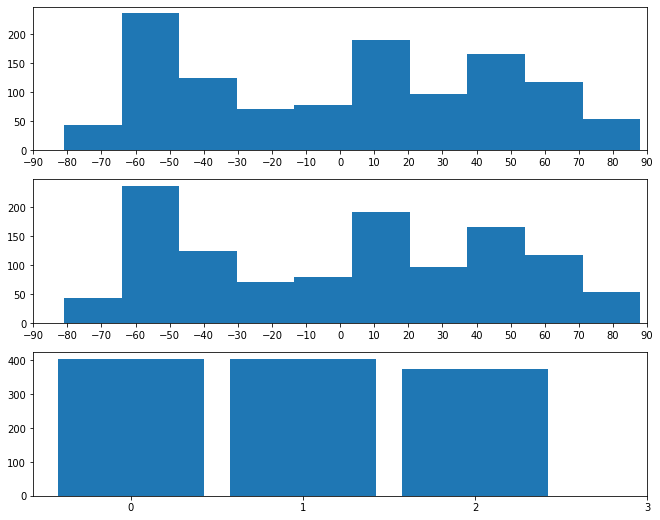

In [68]:
print(f"Numbers of samples in training set {df_train.shape}")

df_train = get_labels(df_train, 60)
df_train['azimuth_rounded'] = round(df_train['azimuth'].astype(int))

print(df_train['labels'].unique())
print(df_train['labels'].max())
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(11, 9))


bins = [i for i in range(df_train['azimuth'].min(), df_train['azimuth'].max() )]

ax1.hist(df_train['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))


ax2.hist(df_train['azimuth_rounded'])
ax2.set_xlim(-90,90)
ax2.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_train['labels'].min(), df_train['labels'].max() +2 )]


ax3.hist(df_train['labels'], bins=bins, align='left', rwidth=0.85)
ax3.set_xticks(np.arange(df_train['labels'].min(), df_train['labels'].max() + 2))


plt.show()


# Distribution of angles full train dataset

Numbers of samples in training set (4031, 11)
[1 4 3 5 2 0]
5


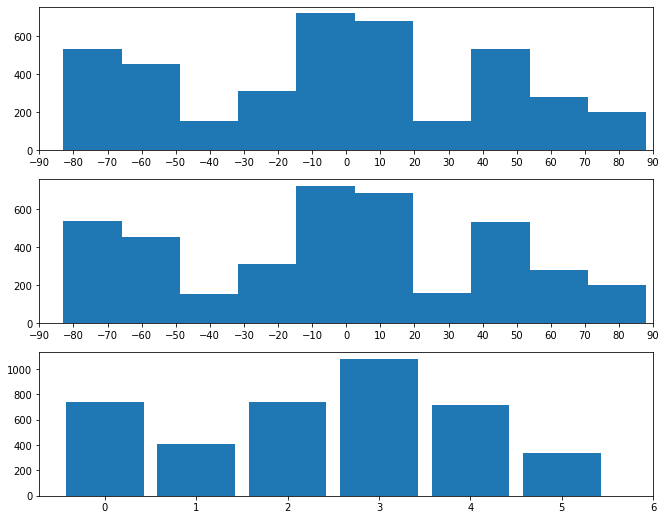

In [67]:
print(f"Numbers of samples in training set {df_full_train.shape}")

df_full_train = get_labels(df_full_train, 30)
df_full_train['azimuth_rounded'] = round(df_full_train['azimuth'].astype(int))

print(df_full_train['labels'].unique())
print(df_full_train['labels'].max())
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(11, 9))


bins = [i for i in range(df_full_train['azimuth'].min(), df_full_train['azimuth'].max() )]

ax1.hist(df_full_train['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))


ax2.hist(df_full_train['azimuth_rounded'])
ax2.set_xlim(-90,90)
ax2.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_full_train['labels'].min(), df_full_train['labels'].max() +2 )]


ax3.hist(df_full_train['labels'], bins=bins, align='left', rwidth=0.85)
ax3.set_xticks(np.arange(df_full_train['labels'].min(), df_full_train['labels'].max() + 2))


plt.show()


# Distribution of angles test dataset

Numbers of samples (19, 13)
Numbers of samples in test set (19, 13)


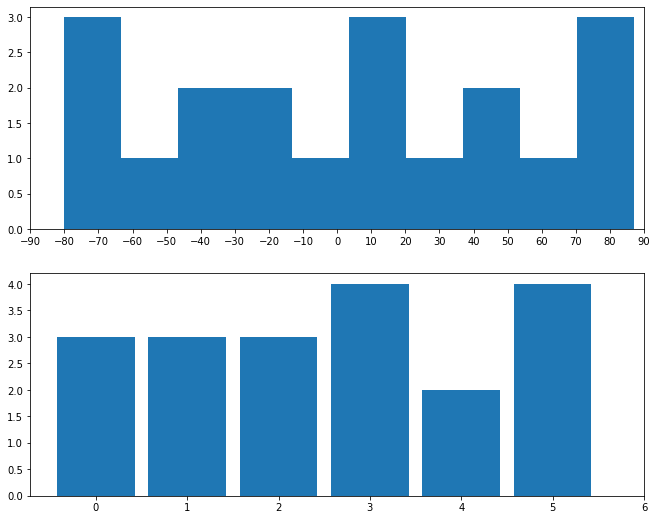

In [56]:
SUBJECT_ID=[44]
df_test = df_train.query('subject_id ==@SUBJECT_ID').reset_index()
print(f"Numbers of samples {df_test.shape}")

print(f"Numbers of samples in test set {df_test.shape}")


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))
df_test = get_labels(df_test, 30)

ax1.hist(df_test['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_test['labels'].min(), df_test['labels'].max() + 2 )]

ax2.hist(df_test['labels'], bins=bins, align='left', rwidth=0.85)
ax2.set_xticks(np.arange(df_test['labels'].min(), df_test['labels'].max() + 2))


plt.show()


In [6]:
df_train['subject_id'].unique()

array([37, 51, 15, 41, 34,  8, 30, 31, 10, 55,  4, 11, 39,  2,  0, 19, 56,
       33,  5, 38, 63, 25,  3, 57,  9, 36,  6, 13, 43, 12, 64, 24, 49, 46,
       61, 26, 29, 20,  1, 28, 53, 32, 27, 14, 52, 45, 60, 62, 23, 18, 35,
       42, 59, 50, 16, 17, 48, 58,  7, 22, 44, 47])

# Chuncked dataset 1000

## Trainning set

In [124]:
df_chunck_train = pd.read_csv("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/datasets/chunck_dataset-1000.csv")
df_chunck_train.shape

(21295, 11)

In [84]:
df_chunck_train.groupby(['labels']).count()

,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,subject_id
labels,,,,,,,,,,
0,8758,8758,8758,8758,8758,8758,8758,8758,8758,8758
1,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309
2,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228


In [112]:
df1 = df_chunck_train[df_chunck_train.labels == 0].sample(5228)
df2 = df_chunck_train[df_chunck_train.labels == 1].sample(5228)
df3 = df_chunck_train[df_chunck_train.labels == 2]

index_to_keep = df1.index.append(df2.index) 
index_to_keep = index_to_keep.append(df3.index)

df_balanced = df_chunck_train.copy()
df_balanced = df_balanced[df_chunck_train.index.isin(index_to_keep)].reset_index()
df_balanced.drop('index',  axis='columns', inplace=True)
# df_balanced = df_balanced[~df_chunck_train.index.isin(df2.index)]


df_balanced.head()

,audio_filename,azimuth,elevation,joint0,joint1,joint2,joint3,joint4,joint5,labels,subject_id
0,0-5_37.wav,-57.0,17.0,20.967033,-0.065934,13.044066,-0.043956,-0.019230,3.393130,0,37.0
1,1-0_37.wav,47.0,22.0,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,2,37.0
2,1-1_37.wav,47.0,22.0,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,2,37.0
3,1-2_37.wav,47.0,22.0,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,2,37.0
4,1-3_37.wav,47.0,22.0,-0.395604,-0.065934,0.296813,0.043956,-0.031535,0.506757,2,37.0


Numbers of samples in train-set-1000 (15684, 11)


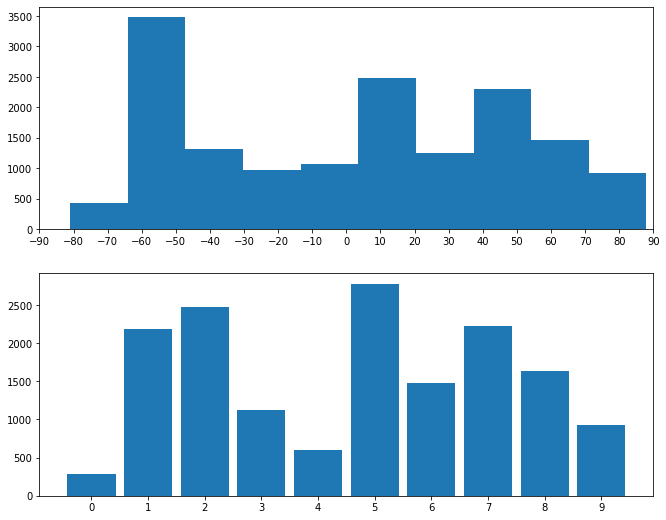

In [150]:
print(f"Numbers of samples in train-set-1000 {df_balanced.shape}")


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))
df_balanced = get_labels(df_balanced, 18)

ax1.hist(df_balanced['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_balanced['labels'].min(), df_balanced['labels'].max() + 2 )]

ax2.hist(df_balanced['labels'], bins=bins, align='left', rwidth=0.85)
ax2.set_xticks(np.arange(df_balanced['labels'].min(), df_balanced['labels'].max() + 1, 1.0))


plt.show()

Numbers of samples in train-set-1000 (15684, 11)


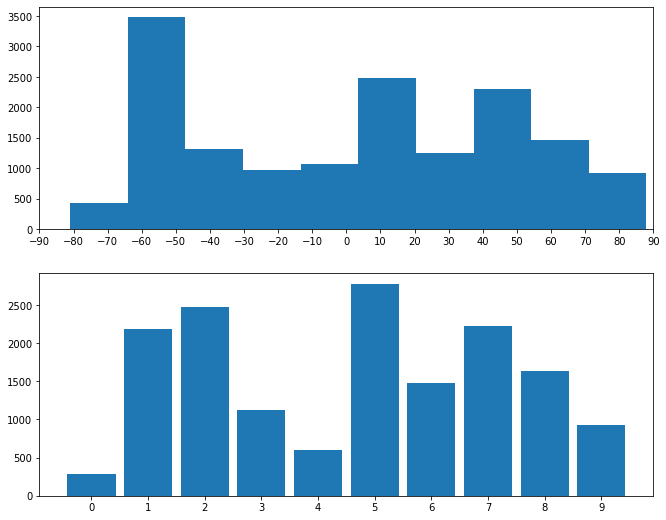

In [119]:
print(f"Numbers of samples in train-set-1000 {df_chunck_train.shape}")


fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 9))
df_chunck_train = get_labels(df_balanced, 18)

ax1.hist(df_chunck_train['azimuth'])
ax1.set_xlim(-90,90)
ax1.set_xticks(np.arange(-90, 100, 10.0))

bins= [i for i in range(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 2 )]

ax2.hist(df_chunck_train['labels'], bins=bins, align='left', rwidth=0.85)
ax2.set_xticks(np.arange(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 1, 1.0))


plt.show()

### Balance the dataset colapsing external labels


In [122]:
df_chunck_train.loc[df_chunck_train['labels'] == 0, 'labels'] = 1
df_chunck_train.loc[df_chunck_train['labels'] == 3, 'labels'] = 4
df_chunck_train['labels'].unique()
# df_balanced.to_csv('../balanced_dataset.csv')

array([1, 7, 6, 9, 4, 5, 2, 8])

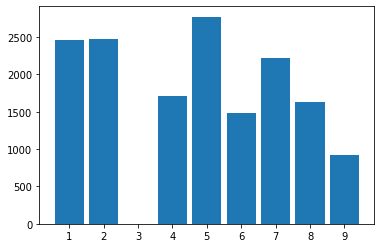

In [121]:

bins= [i for i in range(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 2 )]

plt.hist(df_chunck_train['labels'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_chunck_train['labels'].min(), df_chunck_train['labels'].max() + 1, 1.0))
plt.show()

# Angles per subjects

Numbers of samples (134, 12)


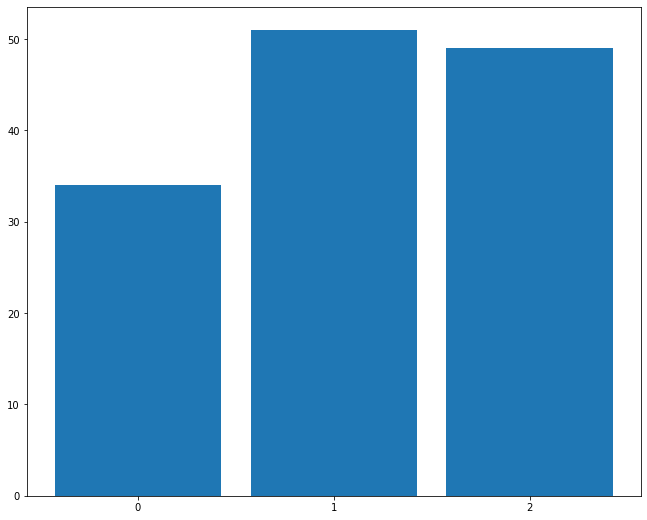

In [115]:
SUBJECT_ID=[44]
df_subject = df_balanced.query('subject_id ==@SUBJECT_ID').reset_index()
print(f"Numbers of samples {df_subject.shape}")

bins= [i for i in range(df_balanced['labels'].min(), df_balanced['labels'].max() + 2 )]
plt.figure(figsize=(11, 9))
plt.hist(df_subject['labels'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_balanced['labels'].min(), df_balanced['labels'].max() + 1, 1.0))
plt.show()

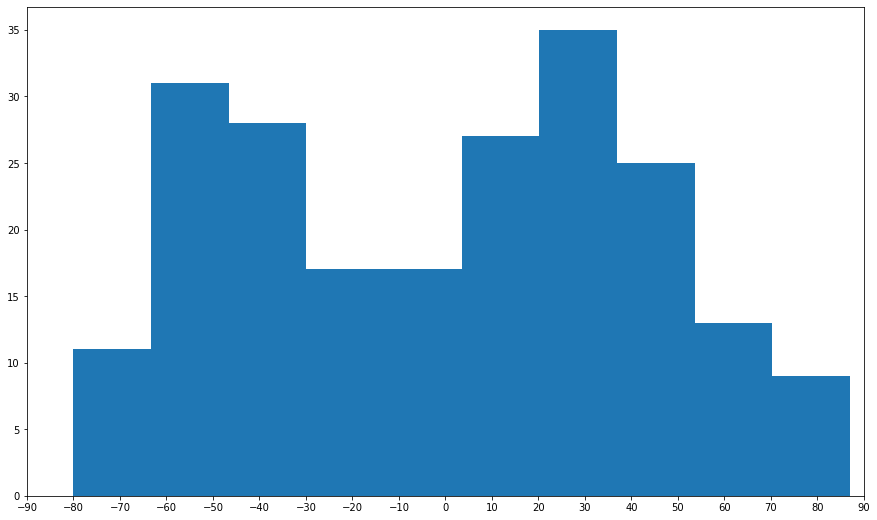

In [12]:
plt.figure(figsize=(15, 9))


plt.hist(df_subject['azimuth'])
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 100, 10.0))
plt.show()

## Test set

In [13]:
df_chunck_test = pd.read_csv("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/test_dataset-1000.csv")
df_chunck_test['subject_id'].unique()

array([21., 54., 40.])

In [14]:
df_chunck_test = get_labels(df_chunck_test, 20)

df_chunck_test.loc[df_chunck_test['labels'] == 0, 'labels'] = 1
df_chunck_test.loc[df_chunck_test['labels'] == 8, 'labels'] = 7
df_chunck_test.to_csv('../balanced_test-dataset.csv')

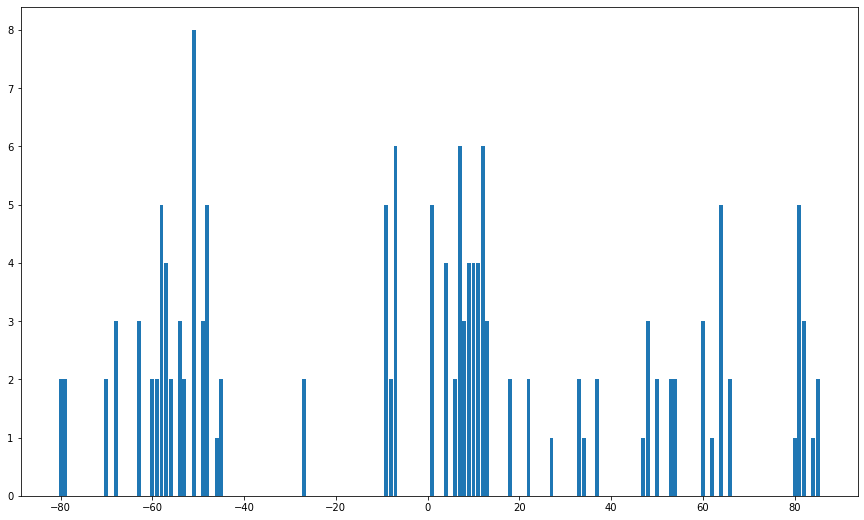

In [15]:
plt.figure(figsize=(15, 9))

bins= [i for i in range(int(df_chunck_test['azimuth'].min()), int(df_chunck_test['azimuth'].max() + 2 ))]

plt.hist(df_chunck_test['azimuth'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_chunck_test['azimuth'].min(), df_chunck_test['azimuth'].max() + 1, 20.0))
plt.show()

## Dataset-TV

Tv test set shape : (710, 11)


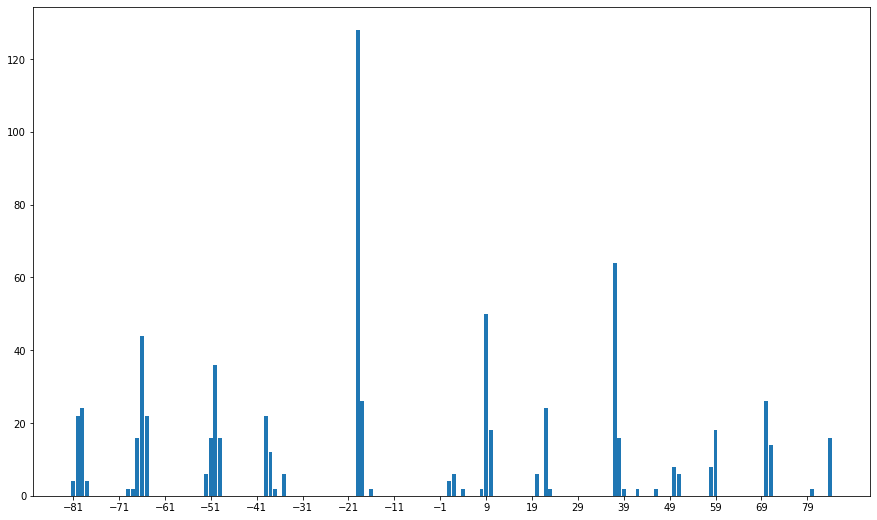

In [16]:
df_tv = pd.read_csv('/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/tv_test-dataset-1000.csv')
print("Tv test set shape : {}".format(df_tv.shape))
plt.figure(figsize=(15, 9))

bins= [i for i in range(int(df_tv['azimuth'].min()), int(df_tv['azimuth'].max() + 2 ))]

plt.hist(df_tv['azimuth'], bins=bins, align='left', rwidth=0.85)
plt.xticks(np.arange(df_tv['azimuth'].min(), df_tv['azimuth'].max() + 1, 10.0))
plt.show()

# Feature visualization

In [1]:
import scipy.io.wavfile as wavfile
from librosa.display import specshow
import librosa
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
from utils import gcc_phat, butter_lowpass_filter, get_fft_gram

PATH_DATA='/home/jonas/Desktop/dataset-1000'
filename_left = df_balanced.query('labels == 0')['audio_filename'].values[90]
filename_right = df_balanced.query('labels == 9')['audio_filename'].values[8]

NameError: name 'df_balanced' is not defined

In [4]:
def normalize_audio(audio):
    
    first_channel = audio[:, 0]
    second_channel = audio[:, 1]

    first_audio = first_channel / np.max(np.abs(first_channel))
    second_audio = second_channel / np.max(np.abs(second_channel))

    norm_audio = np.stack((first_audio, second_audio), axis=1)

    return norm_audio

In [22]:
fs, left_audio = wavfile.read("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/test/left.wav")
fs, right_audio = wavfile.read("/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/test/right.wav")


print("Sample rate: {0}Hz".format(fs))
print("Audio duration: {0}s".format(len(left_audio) / fs))

Sample rate: 48000Hz
Audio duration: 1.0s


(48000, 2)


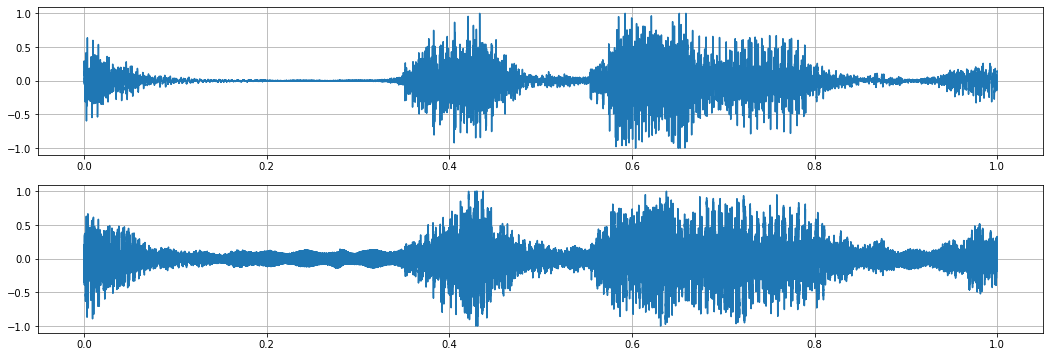

In [23]:
audio_left = normalize_audio(left_audio)
audio_right = normalize_audio(right_audio)


fig, ((ax1), (ax2)) = plt.subplots(2,1 ,figsize=(18,6) )

ax1.plot(np.linspace(0, len(audio_left[:,0]) / fs, num=len(audio_left[:,0])), audio_left[:,0])
ax1.grid(True)

ax2.plot(np.linspace(0, len(audio_left[:,1]) / fs, num=len(audio_left[:,0])), audio_left[:,1])
ax2.grid(True)

print(audio_left.shape)

## GCC-PHAT

## Gammagram

In [8]:
import matplotlib


def erb_point(low_freq, high_freq, fraction):
    """
    Calculates a single point on an ERB scale between ``low_freq`` and
    ``high_freq``, determined by ``fraction``. When ``fraction`` is ``1``,
    ``low_freq`` will be returned. When ``fraction`` is ``0``, ``high_freq``
    will be returned.
    
    ``fraction`` can actually be outside the range ``[0, 1]``, which in general
    isn't very meaningful, but might be useful when ``fraction`` is rounded a
    little above or below ``[0, 1]`` (eg. for plot axis labels).
    """
    # Change the following three parameters if you wish to use a different ERB
    # scale. Must change in MakeERBCoeffs too.
    # TODO: Factor these parameters out
    ear_q = 9.26449 # Glasberg and Moore Parameters
    min_bw = 24.7
    order = 1

    # All of the following expressions are derived in Apple TR #35, "An
    # Efficient Implementation of the Patterson-Holdsworth Cochlear Filter
    # Bank." See pages 33-34.
    erb_point = (
        -ear_q * min_bw
        + np.exp(
            fraction * (
                -np.log(high_freq + ear_q * min_bw)
                + np.log(low_freq + ear_q * min_bw)
                )
        ) *
        (high_freq + ear_q * min_bw)
    )
    
    return erb_point

class ERBFormatter(matplotlib.ticker.EngFormatter):
    """
    Axis formatter for gammatone filterbank analysis. This formatter calculates
    the ERB spaced frequencies used for analysis, and renders them similarly to
    the engineering axis formatter.
    The scale is changed so that `[0, 1]` corresponds to ERB spaced frequencies
    from ``high_freq`` to ``low_freq`` (note the reversal). It should be used
    with ``imshow`` where the ``extent`` argument is ``[a, b, 1, 0]`` (again,
    note the inversion).
    """

    def __init__(self, low_freq, high_freq, *args, **kwargs):
        """
        Creates a new :class ERBFormatter: for use with ``matplotlib`` plots.
        Note that this class does not supply the ``units`` or ``places``
        arguments; typically these would be ``'Hz'`` and ``0``.
        :param low_freq: the low end of the gammatone filterbank frequency range
        :param high_freq: the high end of the gammatone filterbank frequency
          range
        """
        self.low_freq = low_freq
        self.high_freq = high_freq
        super().__init__(*args, **kwargs)

    def _erb_axis_scale(self, fraction):
        return erb_point(self.low_freq, self.high_freq, fraction)

    def __call__(self, val, pos=None):
        newval = self._erb_axis_scale(val)
        return super().__call__(newval, pos)

In [37]:
fmin = 20

left_gammagram1, left_gammagram2  = get_fft_gram(left_audio, fs, channels=256, time_window=0.08, freq_min=fmin)
right_gammagram1, right_gammagram2 = get_fft_gram(right_audio, fs, channels=256, time_window=0.08, freq_min=fmin)

left_gammagram1 = np.flipud(20 * np.log10(left_gammagram1))
left_gammagram2 = np.flipud(20 * np.log10(left_gammagram2))

right_gammagram1 = np.flipud(20 * np.log10(right_gammagram1))
right_gammagram2 = np.flipud(20 * np.log10(right_gammagram2))

print(left_gammagram1.shape)


(256, 21)


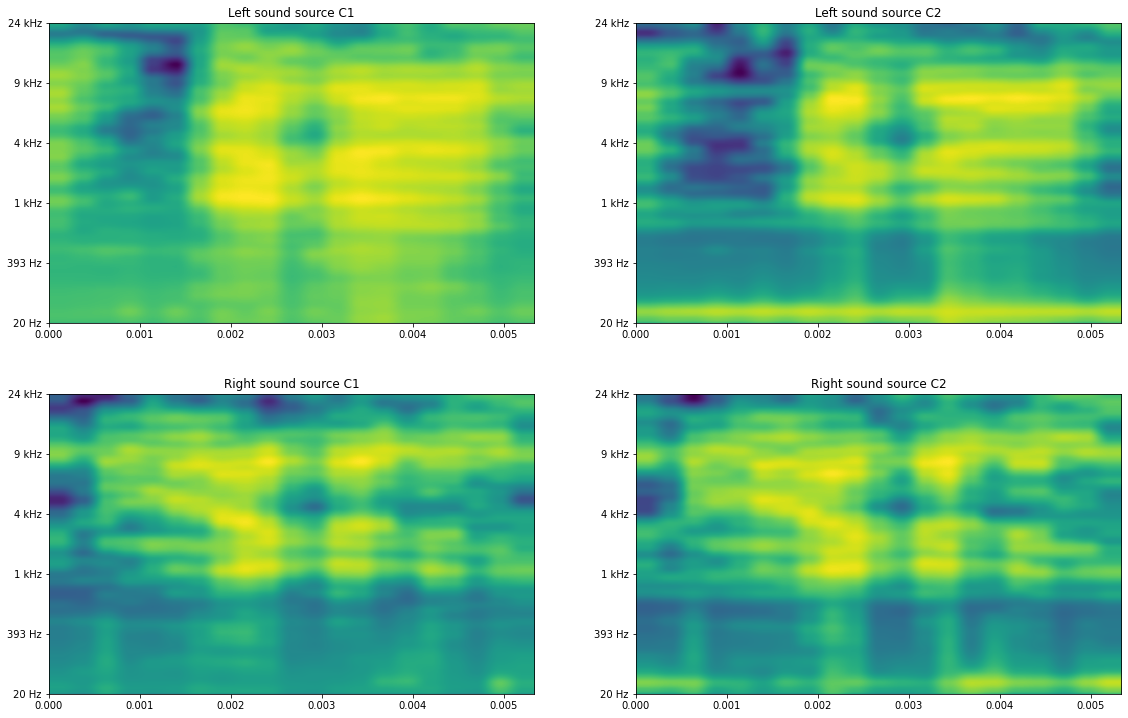

In [38]:
import scipy

duration = len(left_gammagram1) / fs
formatter = ERBFormatter(fmin, fs/2, unit='Hz', places=0)
aspect_ratio = duration/scipy.constants.golden

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 , figsize=(17,11))
fig.tight_layout(pad=5.0)


ax1.imshow(left_gammagram1, extent=[0, duration, 1, 0], aspect=aspect_ratio)
ax1.set_title("Left sound source C1")
ax1.yaxis.set_major_formatter(formatter)

ax2.imshow(left_gammagram2, extent=[0, duration, 1, 0], aspect=aspect_ratio)
ax2.set_title("Left sound source C2")
ax2.yaxis.set_major_formatter(formatter)


ax3.imshow(right_gammagram1, extent=[0, duration, 1, 0], aspect=aspect_ratio)
ax3.set_title("Right sound source C1")
ax3.yaxis.set_major_formatter(formatter)


ax4.imshow(right_gammagram2, extent=[0, duration, 1, 0], aspect=aspect_ratio)
ax4.set_title("Right sound source C2")
ax4.yaxis.set_major_formatter(formatter)

2698


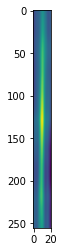

In [41]:

import numpy as np
from scipy.signal import fftconvolve


def normxcorr2(template, image, mode="full"):
    """
    Input arrays should be floating point numbers.
    :param template: N-D array, of template or filter you are using for cross-correlation.
    Must be less or equal dimensions to image.
    Length of each dimension must be less than length of image.
    :param image: N-D array
    :param mode: Options, "full", "valid", "same"
    full (Default): The output of fftconvolve is the full discrete linear convolution of the inputs. 
    Output size will be image size + 1/2 template size in each dimension.
    valid: The output consists only of those elements that do not rely on the zero-padding.
    same: The output is the same size as image, centered with respect to the ‘full’ output.
    :return: N-D array of same dimensions as image. Size depends on mode parameter.
    """

    # If this happens, it is probably a mistake
    if np.ndim(template) > np.ndim(image) or \
            len([i for i in range(np.ndim(template)) if template.shape[i] > image.shape[i]]) > 0:
        print("normxcorr2: TEMPLATE larger than IMG. Arguments may be swapped.")

    template = template - np.mean(template)
    image = image - np.mean(image)

    a1 = np.ones(template.shape)
    # Faster to flip up down and left right then use fftconvolve instead of scipy's correlate
    ar = np.flipud(np.fliplr(template))
    out = fftconvolve(image, ar.conj(), mode=mode)
    
    image = fftconvolve(np.square(image), a1, mode=mode) - \
            np.square(fftconvolve(image, a1, mode=mode)) / (np.prod(template.shape))

    # Remove small machine precision errors after subtraction
    image[np.where(image < 0)] = 0

    template = np.sum(np.square(template))
    out = out / np.sqrt(image * template)

    # Remove any divisions by 0 or very close to 0
    out[np.where(np.logical_not(np.isfinite(out)))] = 0
    
    return out


cor = normxcorr2(left_gammagram1, left_gammagram2, mode='same')
print(cor.argmax())
plt.imshow(cor)

2719


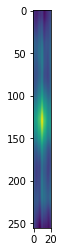

In [42]:
cor = normxcorr2(right_gammagram1, right_gammagram2,  mode='same')
print(cor.argmax())
plt.imshow(cor)

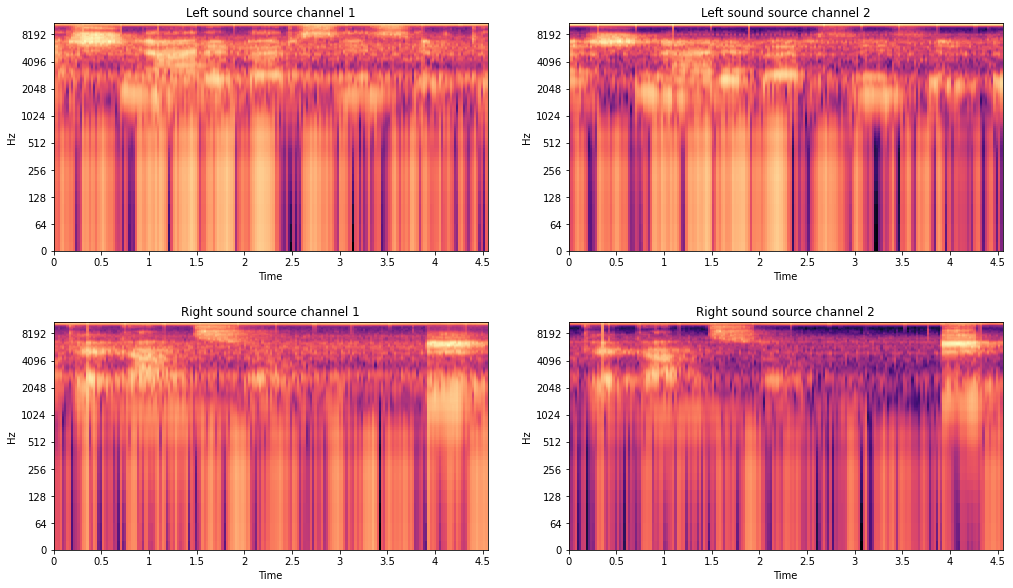

In [241]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 , figsize=(15,9))
fig.tight_layout(pad=5.0)

specshow(left_gammagram1, x_axis='time', y_axis='log', ax=ax1)
ax1.set_title("Left sound source channel 1")

specshow(left_gammagram2, x_axis='time', y_axis='log', ax=ax2)
ax2.set_title("Left sound source channel 2")

specshow(right_gammagram1, x_axis='time', y_axis='log', ax=ax3)
ax3.set_title("Right sound source channel 1")

specshow(right_gammagram2, x_axis='time', y_axis='log', ax=ax4)
ax4.set_title("Right sound source channel 2")


plt.show()

## MFCC

In [237]:
def get_mfcc(data, fs, n_f=120):
    signal1 = data[:, 0]
    signal2 = data[:, 1]
    input_1 = librosa.feature.mfcc(signal1.astype(float), fs, n_mfcc=n_f)
    input_2 = librosa.feature.mfcc(signal2.astype(float), fs, n_mfcc=n_f)

    input_x = np.stack((input_1, input_2), axis=-1)
    return input_x
    

In [239]:
left_mfcc = get_mfcc(left_audio, fs, 20)
right_mfcc = get_mfcc(right_audio, fs, 20)

print("MFCC shape {}".format(left_mfcc.shape))


MFCC shape (20, 94, 2)


/home/jonas/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/jonas/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/jonas/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


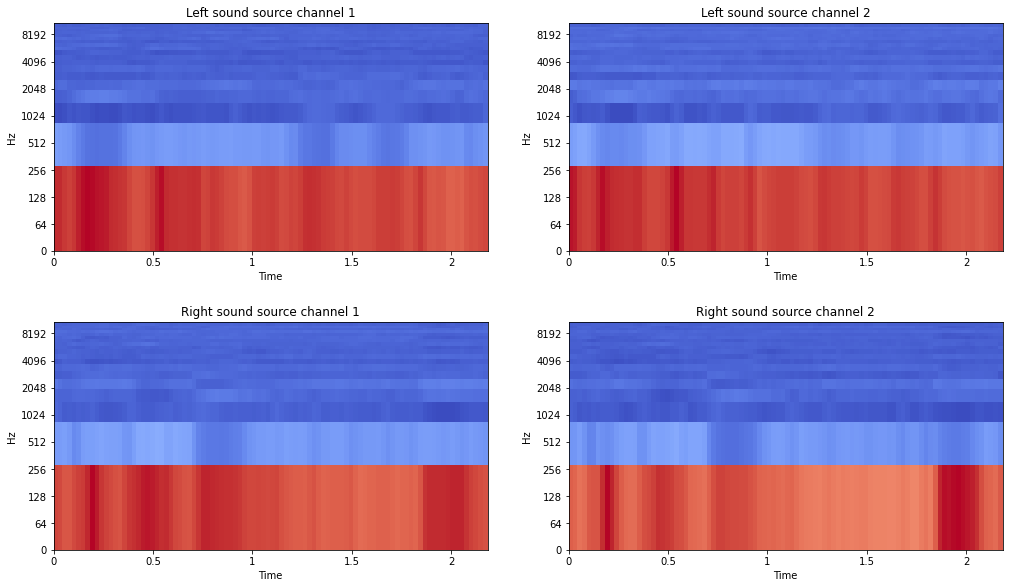

In [240]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 , figsize=(15,9))
fig.tight_layout(pad=5.0)


specshow(left_mfcc[:,:,0], x_axis='time', y_axis='log', ax=ax1)
ax1.set_title("Left sound source channel 1")

specshow(left_mfcc[:,:,1], x_axis='time', y_axis='log', ax=ax2)
ax2.set_title("Left sound source channel 2")
         
         
specshow(right_mfcc[:,:,0], x_axis='time', y_axis='log', ax=ax3)
ax3.set_title("Right sound source channel 1")

specshow(right_mfcc[:,:,1], x_axis='time', y_axis='log', ax=ax4)
ax4.set_title("Right sound source channel 2")
         
plt.show()


235
235


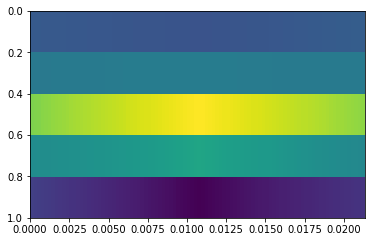

In [202]:
cor = normxcorr2(right_mfcc[:,:,0], right_mfcc[:,:,1],  mode='same')
print(cor.argmax())
plt.imshow(cor,extent=[0, duration, 1, 0], aspect=aspect_ratio)

cor = normxcorr2(left_mfcc[:,:,0], left_mfcc[:,:,1],  mode='same')
print(cor.argmax())
plt.imshow(cor,extent=[0, duration, 1, 0], aspect=aspect_ratio)


## Data Augmentation

In [236]:
import IPython.display as ipd
test_audio = left_audio[:,0]
ipd.Audio(test_audio, rate=fs) # load a local WAV file


In [235]:
import librosa
import scipy.io.wavfile
def manipulate(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

new_audio = manipulate(test_audio.astype(float), fs, 5.1)

new_audio = new_audio.astype(np.int16)

scipy.io.wavfile.write('test-440.wav', fs, new_audio)

ipd.Audio(new_audio, rate=fs) # load a local WAV file


In [ ]:
df_balanced_bis  = pd.read_csv('/home/jonas/CLionProjects/soundLocalizer/python-scripts/analysis/balanced_dataset_bis.csv')


a = df_balanced_bis['azimuth'].value_counts()